In [456]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
pd.set_option('display.max_colwidth', None)

gk_green = '#07b871'
red = "#f55b5b"
dark_red = "#db0000"
grey = "#c2c2c2"
blue = "#4287f5"

### Load Data

In [148]:
issues = pd.read_csv('./csv/greenkeeper_issues.csv')
comments = pd.read_csv('./csv/greenkeeper_comments.csv')
events = pd.read_csv('./csv/greenkeeper_events.csv')
commits = pd.read_csv('./csv/greenkeeper_commits.csv')
package_names = pd.read_csv('./csv/greenkeeper_package_names.csv')

/Users/BenRombaut/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (14,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


- 123,197 Greenkeeper Breaking Build issue reports (across 12,134 unique projects)
- 365,625 comments for those issue reports
- 209,750 events on those issue reports   
    Includes **['labeled', 'closed', 'referenced', 'unsubscribed', 'milestoned', 'assigned', 'mentioned', 'reopened', 'renamed', 'added_to_project', 'moved_columns_in_project', 'subscribed', 'locked', 'demilestoned', 'connected', 'unassigned', 'unlocked', 'unlabeled', 'merged', 'head_ref_deleted', 'removed_from_project', 'transferred', 'comment_deleted', 'pinned', 'unpinned', 'marked_as_duplicate']**
- 17,623 commits that were referenced in these breaking issue reports


In [488]:
# events[pd.notna(events.event_commit_id)]
# print(len(issues.issue_repo_url.unique()))
# len(package_names)


,issue_id,issue_number,issue_url,issue_title,issue_state,issue_is_locked,issue_created_at,issue_updated_at,issue_closed_at,issue_user_login,...,issue_num_comments,issue_events_url,issue_dependency_name,issue_dependency_type,issue_dependency_actual_version,issue_dependency_next_version,issue_dependency_bundle_name,issue_body_parser,issue_repo_url,update_type
383,622803942,28,https://api.github.com/repos/mrWh1te/Botmation/issues/28,An in-range update of @types/node is breaking the build,open,False,2020-05-21 21:30:54,2020-08-18T03:10:45Z,NaN,greenkeeper[bot],...,6,https://api.github.com/repos/mrWh1te/Botmation/issues/28/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/mrWh1te/Botmation,NaN
446,620158239,26,https://api.github.com/repos/mrWh1te/Botmation/issues/26,An in-range update of puppeteer is breaking the build,open,False,2020-05-18 12:12:03,2020-08-24T16:05:21Z,NaN,greenkeeper[bot],...,6,https://api.github.com/repos/mrWh1te/Botmation/issues/26/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/mrWh1te/Botmation,NaN
13341,537849824,182,https://api.github.com/repos/cdimascio/express-openapi-validator/issues/182,An in-range update of @types/node is breaking the build,closed,False,2019-12-14 02:01:05,2020-08-15T02:09:33Z,2019-12-14T02:04:37Z,cdimascio,...,0,https://api.github.com/repos/cdimascio/express-openapi-validator/issues/182/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/cdimascio/express-openapi-validator,NaN
17183,521644404,1113,https://api.github.com/repos/OpenLightingProject/open-fixture-library/issues/1113,An in-range update of eslint-plugin-jsdoc is breaking the build,closed,False,2019-11-12 16:06:31,2019-11-14T13:14:15Z,2019-11-14T13:14:03Z,greenkeeper[bot],...,2,https://api.github.com/repos/OpenLightingProject/open-fixture-library/issues/1113/events,eslint-plugin-jsdoc,devDependency,17.1.1,17.1.2,NaN,NewDepUpdatedFromToIssueBodyParser,https://api.github.com/repos/OpenLightingProject/open-fixture-library,patch
44303,442478027,2862,https://api.github.com/repos/strongloop/loopback-next/issues/2862,An in-range update of @loopback/rest is breaking the build [INVALID],closed,False,2019-05-09 23:36:28,2019-05-13T09:38:37Z,2019-05-13T09:38:37Z,greenkeeper[bot],...,0,https://api.github.com/repos/strongloop/loopback-next/issues/2862/events,@loopback/rest,dependency,undefined,1.11.0,NaN,NewDepUpdatedFromTo2IssueBodyParser,https://api.github.com/repos/strongloop/loopback-next,NaN
44304,442476461,2861,https://api.github.com/repos/strongloop/loopback-next/issues/2861,An in-range update of @loopback/boot is breaking the build [INVALID],closed,False,2019-05-09 23:28:48,2019-05-13T09:38:36Z,2019-05-13T09:38:36Z,greenkeeper[bot],...,0,https://api.github.com/repos/strongloop/loopback-next/issues/2861/events,@loopback/boot,dependency,undefined,1.2.5,NaN,NewDepUpdatedFromTo2IssueBodyParser,https://api.github.com/repos/strongloop/loopback-next,NaN
44305,442473392,2860,https://api.github.com/repos/strongloop/loopback-next/issues/2860,An in-range update of @loopback/core is breaking the build [INVALID],closed,False,2019-05-09 23:14:50,2019-05-13T09:38:36Z,2019-05-13T09:38:36Z,greenkeeper[bot],...,0,https://api.github.com/repos/strongloop/loopback-next/issues/2860/events,@loopback/core,dependency,undefined,1.6.2,NaN,NewDepUpdatedFromTo2IssueBodyParser,https://api.github.com/repos/strongloop/loopback-next,NaN
44306,442324850,2858,https://api.github.com/repos/strongloop/loopback-next/issues/2858,An in-range update of @types/lodash is breaking the build,closed,False,2019-05-09 16:28:32,2019-05-13T07:16:42Z,2019-05-13T07:16:42Z,greenkeeper[bot],...,1,https://api.github.com/repos/strongloop/loopback-next/issues/2858/events,@types/lodash,devDependency,4.14.124,4.14.125,NaN,NewDepUpdatedFromToIssueBodyParser,https://api.github.com/repos/strongloop/loopback-next,patch
47424,435563564,31,https://api.github.com/repos/SensitiveMix/node-cypto/issues/31,An in-range update of jest2 is breaking the build,closed,False,20

#### Custome Helper Functions

In [218]:
def get_issue(id):
    return issues[issues['issue_id'] == id]

def get_issue_url(id):
    return issues[issues['issue_id'] == id]['issue_url']

def get_comment(id):
    return comments[comments['comment_id'] == id]

def get_comments_for_issue(id):
    return comments[comments['comment_issue_id'] == id]

def get_event(id):
    return events[events['event_id'] == id]

def calculate_percent(numer, denom):
    return round((numer/denom)*100, 2)

#### Augment Data

In [152]:
def get_issue_id_for_commit(commit):
    try:
        event_id = commit.commit_event_id
        event = get_event(event_id)
        if event.size == 0:
            return np.nan
        issue = get_issue(event.event_issue_id.values[0].astype(np.int64))
        if issue.size == 0:
            return np.nan
        return issue.issue_id.values[0].astype(np.int64)
    except Exception:
        return np.nan

commits['commit_issue_id'] = commits.apply(get_issue_id_for_commit, axis=1)

Catoegorize Columns

In [443]:
events['event_description'] = events['event_description'].astype('category')
issues["issue_created_at"] = issues["issue_created_at"].astype("datetime64")


Add update type to issues table

In [442]:
def get_update_type(issue_row):
    prev_ver = issue_row['issue_dependency_actual_version']
    new_ver = issue_row['issue_dependency_next_version']
    if pd.isnull(prev_ver) or pd.isnull(new_ver):
        return pd.NA
    try:
        prev_split = prev_ver.split('.')
        new_split = new_ver.split('.')
        if int(new_split[0]) > int(prev_split[0]):
            return "major"
        elif int(new_split[1]) > int(prev_split[1]):
            return "minor"
        else:
            return "patch"
    except Exception as e:
        return pd.NA

issues['update_type'] = issues.apply(get_update_type, axis=1)
issues['update_type'] = issues['update_type'].astype('category')


## What types are updates are breaking client's builds?

In [464]:
issues_with_update_type_count = len(issues[~(issues['update_type'].isnull())])
percent_with_update_type = calculate_percent(issues_with_update_type_count, len(issues))
print(f"{percent_with_update_type}% ({issues_with_update_type_count}) of Greenkeeper issues could have their update type extracted.")

64.23% (79132) of Greenkeeper issues could have their update type extracted.


In [467]:
issues[issues['update_type'].isnull()]

,issue_id,issue_number,issue_url,issue_title,issue_state,issue_is_locked,issue_created_at,issue_updated_at,issue_closed_at,issue_user_login,...,issue_num_comments,issue_events_url,issue_dependency_name,issue_dependency_type,issue_dependency_actual_version,issue_dependency_next_version,issue_dependency_bundle_name,issue_body_parser,issue_repo_url,update_type
0,629403739,11,https://api.github.com/repos/mohan-cao/3MLE2MS2/issues/11,An in-range update of fortawesome is breaking the build 🚨,open,False,2020-06-02 17:58:59,2020-06-02T17:59:00Z,NaN,greenkeeper[bot],...,0,https://api.github.com/repos/mohan-cao/3MLE2MS2/issues/11/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/mohan-cao/3MLE2MS2,NaN
1,628090144,10,https://api.github.com/repos/d-band/sk2/issues/10,An in-range update of nyc is breaking the build 🚨,open,False,2020-06-01 01:18:24,2020-06-01T01:23:56Z,NaN,greenkeeper[bot],...,1,https://api.github.com/repos/d-band/sk2/issues/10/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/d-band/sk2,NaN
2,628092207,18,https://api.github.com/repos/CassandraSpruit/Array-Like-Map/issues/18,An in-range update of nyc is breaking the build 🚨,open,False,2020-06-01 01:25:49,2020-06-01T01:26:52Z,NaN,greenkeeper[bot],...,1,https://api.github.com/repos/CassandraSpruit/Array-Like-Map/issues/18/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/CassandraSpruit/Array-Like-Map,NaN
3,628091232,112,https://api.github.com/repos/d-band/better-xlsx/issues/112,An in-range update of nyc is breaking the build 🚨,open,False,2020-06-01 01:22:17,2020-06-01T01:24:17Z,NaN,greenkeeper[bot],...,1,https://api.github.com/repos/d-band/better-xlsx/issues/112/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/d-band/better-xlsx,NaN
4,629137696,9,https://api.github.com/repos/nicolasmn/sass-directions/issues/9,An in-range update of sassdoc is breaking the build 🚨,open,False,2020-06-02 11:46:41,2020-06-02T11:49:47Z,NaN,greenkeeper[bot],...,1,https://api.github.com/repos/nicolasmn/sass-directions/issues/9/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/nicolasmn/sass-directions,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123192,185283598,93,https://api.github.com/repos/hoodiehq-archive/hoodie-account/issues/93,An in-range update of standard is breaking the build 🚨,closed,False,2016-10-26 02:44:53,2016-10-26T03:11:41Z,2016-10-26T03:11:41Z,greenkeeper[bot],...,1,https://api.github.com/repos/hoodiehq-archive/hoodie-account/issues/93/events,standard,NaN,8.5.0,NaN,NaN,NewDepVersionIssueBodyParser,https://api.github.com/repos/hoodiehq-archive/hoodie-account,NaN
123193,184925517,29,https://api.github.com/repos/greenkeeperio-test/gk-test/issues/29,An in-range update of gk-test-dep is breaking the build 🚨,closed,False,2016-10-24 18:58:42,2018-10-16T09:47:48Z,2016-10-24T19:10:33Z,greenkeeper-staging-w-o-issues[bot],...,2,https://api.github.com/repos/greenkeeperio-test/gk-test/issues/29/events,gk-test-dep,NaN,113.0.19,NaN,NaN,NewDepVersionIssueBodyParser,https://api.github.com/repos/greenkeeperio-test/gk-test,NaN
123194,184929057,31,https://api.github.com/repos/greenkeeperio-test/gk-test/issues/31,An in-range update of gk-test-dep is breaking the build 🚨,closed,False,2016-10-24 19:13:51,2018-10-16T09:47:48Z,2017-01-20T14:31:39Z,greenkeeper-staging-w-o-issues[bot],...,3,https://api.github.com/repos/greenkeeperio-test/gk-test/issues/31/events,gk-test-dep,NaN,114.1.1,NaN,NaN,NewDepVersionIssueBodyParser,https://api.github.com/repos/greenkeeperio-test/gk-test,NaN
123195,184924004,28,https://api.github.com/repos/greenkeeperio-test/gk-test/issues/28,An in-range update of gk-test-dep is breaking the build 🚨,closed,False,2016-10-24 18:52:25,2018-10-16T09:47:48Z,2016-10-24T18:57:58Z,greenkeeper-staging-w-o-issues[bot],...,1,https://api.github.com/repos/greenkeeperio-test/gk-test/issues/28/events,gk-test-dep,NaN,113.0.18,NaN,NaN,NewDepVersionIssueBodyParser,https://api.github.com/repos/greenkeeperio

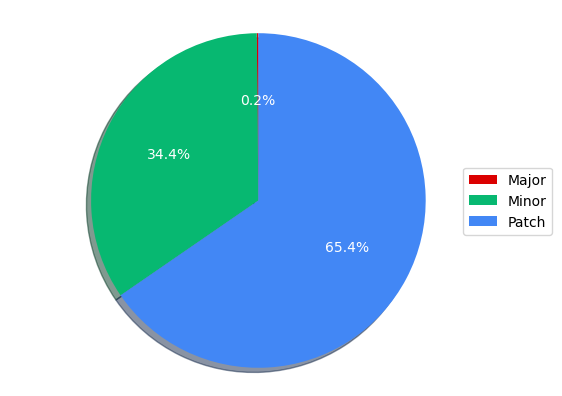

In [460]:
# Plot pie chart for update types
mpl.style.use("default")
labels = "Major", 'Minor', 'Patch'
major_count = len(issues[issues['update_type'] == 'major'])
minor_count = len(issues[issues['update_type'] == 'minor'])
patch_count = len(issues[issues['update_type'] == 'patch'])

sizes = [major_count, minor_count, patch_count]
colors = [dark_red, gk_green, blue]
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    textprops=dict(color="w")
)
ax.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis('equal')
plt.show()

In [411]:
# from packaging import version
# # package_names[package_names['package_gh_url_api'] == 'https://api.github.com/repos/mohan-cao/3MLE2MS2']
# # package_names.head()
# # issues.head()

# def parse_sem_ver(string):
#     temp = version.parse(string)
#     print(temp.release)
    
# parse_sem_ver("3.2.1")
# # package_names.head()

(3, 2, 1)


## How often is Greenkeeper opening issues?

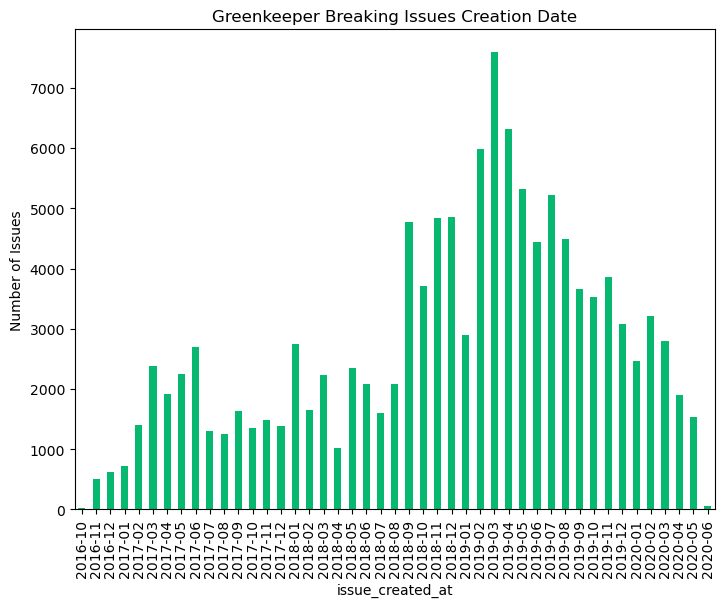

In [391]:
issues_grouped = issues.groupby(issues["issue_created_at"].dt.to_period('M'))
issues_grouped['issue_created_at'].count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Number of Issues')
ax.set_xlabel('Created At')
ax.set_title('Greenkeeper Breaking Issues Creation Date')
# ax.bar(issues_grouped['issue_created_at'].count(), issues_grouped['issue_created_at'].count(), color='r')
# plt.show()
issues_grouped['issue_created_at'].count().plot(kind="bar", color=gk_green)


## Closing Issues & Response Times

### How often are Greenkeeper Build Breakage Issue Reports closed?

In [343]:
n_issues = len(issues)
n_closed_issues = len(issues[issues.issue_state == "closed"])
percent_closed = calculate_percent(n_closed_issues, n_issues)
print(f"{percent_closed}% ({n_closed_issues}) of Greenkeeper issues are eventually closed")

79.82% (98341) of Greenkeeper issues are eventually closed


### How much time do Greenkeeper issues take to be closed?

In [197]:
closed_issues = issues[issues["issue_state"] == "closed"]
def calculate_time_diff(issue):
    d1 = issue.issue_created_at
    d2 = issue.issue_closed_at
    FMT = '%Y-%m-%dT%H:%M:%S%z'
    return (datetime.strptime(d2, FMT) - datetime.strptime(d1, FMT))

time_to_close_issue = pd.DataFrame({
    'issue_id': closed_issues.issue_id, 
    'time_to_close_issue': closed_issues.apply(lambda row: calculate_time_diff(row), axis=1),
})

median_time = time_to_close_issue['time_to_close_issue'].median()
print(f"The median time to close the issue is {median_time} hours")


The median time to close the issue is 4 days 11:04:25 hours


In [310]:
print("Five number summary for the time to close the Greenkeeper issue:")
print(time_to_close_issue['time_to_close_issue'].describe())

Five number summary for the time to close the Greenkeeper issue:
count                      98341
mean     43 days 04:48:28.851343
std      98 days 22:44:48.052636
min              0 days 00:00:04
25%              0 days 09:58:19
50%              4 days 11:04:25
75%             35 days 07:48:16
max           1219 days 02:01:10
Name: time_to_close_issue, dtype: object


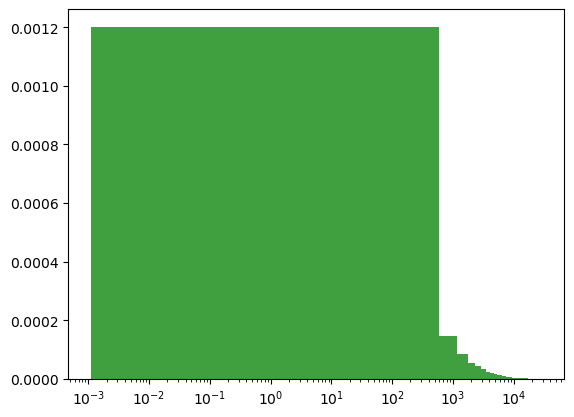

In [324]:
time_to_close_issue['time_to_close_issue_hours'] = \
    (time_to_close_issue['time_to_close_issue'].astype('timedelta64[s]')) / 60 / 60

time_to_close_issue['time_to_close_issue'].describe()
n, bins, patches = plt.hist(
    time_to_close_issue['time_to_close_issue_hours'], 50, density=True, facecolor='g', alpha=0.75)
ax = plt.gca()
ax.set_xscale('log')
plt.show()

# TODO: Figure out this graph!

# time_to_close_issue['time_to_close_issue_hours']
# ax = sns.kdeplot(
#     time_to_close_issue['time_to_close_issue_hours'],
#     shade=True,
#     bw=.01,
# )
# ax. set(xscale="log")
# ax = sns.violinplot(
#     data=time_to_close_issue,
#     y="time_to_close_issue_hours"
# )
# ax.set(yscale="symlog")
# ax = sns.distplot(time_to_close_issue["time_to_close_issue_hours"])
# ax.set(xscale="log")

## Comments on Greenkeeper Breaking Issues

### How many comments do Greenkeeper Breaking Issues have?

In [158]:
print("Five number summary for the number of comments on Greenkeeper Breakage issues:")
print(issues["issue_num_comments"].describe())

Five number summary for the number of comments on Greenkeeper Breakage issues:
count    123197.000000
mean          4.775555
std          29.850343
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2500.000000
Name: issue_num_comments, dtype: float64


In [491]:
threshold = 2
at_least_one_comment = issues[issues["issue_num_comments"] >= threshold]
percent_one_comment = calculate_percent(len(at_least_one_comment), len(issues))
print(f"{percent_one_comment}% ({len(at_least_one_comment)}) of issues have at least {threshold} comment.")


47.95% (59067) of issues have at least 2 comment.


In [160]:
## This could take a few minutes
def get_first_comment(issue):
    issue_comments = get_comments_for_issue(issue['issue_id'])
    if issue_comments.empty:
        return None
    first_comment = issue_comments[issue_comments['comment_id'] == issue_comments['comment_id'].min()]
    first_comment
    return first_comment['comment_id'].values[0].astype(np.int64)

issue_first_comment = pd.DataFrame({
    'issue_id': issues.issue_id, 
    'comment_id': issues.apply(lambda row: get_first_comment(row), axis=1),
})
issue_first_comment_filtered = issue_first_comment[pd.notna(issue_first_comment['comment_id'])]

### How many of these are from Greenkeeper?

In [347]:
comments_by_greenkeeper = comments[
    (comments['comment_user_type'] == "Bot") & 
    (comments['comment_user_login'].str.contains("greenkeeper"))
]
percent_comments_by_greenkeeper = calculate_percent(len(comments_by_greenkeeper), len(comments))
print(f"{percent_comments_by_greenkeeper}% ({len(comments_by_greenkeeper)}) of comments on breaking issue reports opened by Greenkeeper are from the Greenkeeper bot.")

96.89% (354250) of comments on breaking issue reports opened by Greenkeeper are from the Greenkeeper bot.


### What are users saying?

In [492]:
users_comments = comments[(comments['comment_user_type'] == "User")]
percent_of_user_comments = calculate_percent(len(users_comments), len(comments))
unique_issue_ids = users_comments['comment_issue_id'].unique()
percent_of_issues_with_user_comment = calculate_percent(len(unique_issue_ids), len(issues['issue_id']))
print(f"{len(users_comments)} comments from users ({percent_of_user_comments}% of comments) on {len(unique_issue_ids)} unique issues ({percent_of_issues_with_user_comment}% of issues)")
# comments_by_users.head(30)


10724 comments from users (2.93% of comments) on 9854 unique issues (8.0% of issues)


#### How many link a pull request?

In [362]:
reg_pr_url = 'https:\/\/github\.com\/[\S]*\/pull\/[\S]*'
reg_closed_by = '(closed|fixed|resolved|done) (in|by|via|with)'

comments_with_pr_body = users_comments[
    (pd.notna(users_comments['comment_body'])) & (
        (users_comments['comment_body'].str.contains(pat=reg_pr_url, case=True, regex=True)) | 
        (users_comments['comment_body'].str.contains(pat=reg_closed_by, case=False, regex=True))
    )
]
print(f"{len(comments_with_pr_body)} comments from users explicitly link a Pull Request or comment closed with a link.")

3086 comments from users explicitly link a Pull Request or comment closed with a link.


/Users/BenRombaut/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


#### How many appear to be a false positive?

In [309]:
reg_flaky = 'flaky'
reg_retrigger = '(retrigger|re-trigger|rebuild|re-build|restarting|re-starting)'
reg_false_positive = 'false (positive|alarm|negative)'
reg_invalid = '^(invalid|not applicable|not (a|an) issue)$'


comments_with_false_positive = users_comments[
    (pd.notna(users_comments['comment_body'])) & (
        (users_comments['comment_body'].str.contains(pat=reg_flaky, case=False, regex=True)) |
        (users_comments['comment_body'].str.contains(pat=reg_retrigger, case=False, regex=True)) |
        (users_comments['comment_body'].str.contains(pat=reg_false_positive, case=False, regex=True)) | 
        (users_comments['comment_body'].str.contains(pat=reg_invalid, case=False, regex=True))
    )
]
print(f"{len(comments_with_false_positive)} comments from users indicate a false positive.")

1190 comments from users indicate a false positive.


#### Breakdown of User Comments

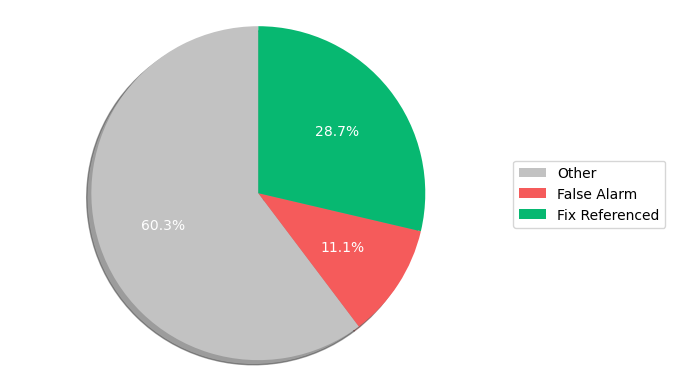

In [351]:
other = users_comments[
    (~users_comments['comment_id'].isin(comments_with_pr_body['comment_id'])) & 
    (~users_comments['comment_id'].isin(comments_with_false_positive['comment_id']))
]

# Plot pie chart for pins
mpl.style.use("default")
labels = "Other", 'False Alarm', 'Fix Referenced'
sizes = [len(other), len(comments_with_false_positive), len(comments_with_pr_body)]
colors = [grey, red, gk_green]
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    textprops=dict(color="w")
)
ax.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')
plt.show()

In [361]:
comments_with_false_positive.sort_values(by=['comment_created_at']).tail(5)
get_issue_url(618923783)

774    https://api.github.com/repos/adobe/spectrum-web-components/issues/677
Name: issue_url, dtype: object

#### TODO: How long until they link a pr (OR until first user interaction (i.e. first comment from user)?

In [303]:
# For every comment
#   calculate time diff between its associated issue created date and the comment created date

comments_with_pr_body.sample(30)['comment_body']

146562                                                                                                                                                                                                                                                                                                                                                                                               :tada: This issue has been resolved in version 8.8.6 :tada:\n\nThe release is available on:\n- [npm package (@latest dist-tag)](https://www.npmjs.com/package/sweetalert2)\n- [GitHub release](https://github.com/sweetalert2/sweetalert2/releases/tag/v8.8.6)\n\nYour **[semantic-release](https://github.com/semantic-release/semantic-release)** bot :package::rocket:
169069    :tada: This issue has been resolved in version 3.0.0 :tada:\n\nThe release is available on:\n- [GitHub release](https://github.com/Alorel/polyfill.io-aot/releases/tag/3.0.0)\n- [npm package (@latest dist-tag)](https://www.npmjs.com/package

In [299]:
# reg_temp = 'false negative'
# users_comments[
#     (pd.notna(users_comments['comment_body'])) & (
#         (users_comments['comment_body'].str.contains(pat=reg_temp, case=False, regex=True))
#     )
# ].head(50)['comment_body']

temp = users_comments[
    (~users_comments['comment_id'].isin(comments_with_pr_body['comment_id'])) & 
    (~users_comments['comment_id'].isin(comments_with_false_positive['comment_id']))
]
temp.sample(30)['comment_body']

356517                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [481]:
issues[issues['issue_state'] == 'open']

,issue_id,issue_number,issue_url,issue_title,issue_state,issue_is_locked,issue_created_at,issue_updated_at,issue_closed_at,issue_user_login,...,issue_num_comments,issue_events_url,issue_dependency_name,issue_dependency_type,issue_dependency_actual_version,issue_dependency_next_version,issue_dependency_bundle_name,issue_body_parser,issue_repo_url,update_type
0,629403739,11,https://api.github.com/repos/mohan-cao/3MLE2MS2/issues/11,An in-range update of fortawesome is breaking the build 🚨,open,False,2020-06-02 17:58:59,2020-06-02T17:59:00Z,NaN,greenkeeper[bot],...,0,https://api.github.com/repos/mohan-cao/3MLE2MS2/issues/11/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/mohan-cao/3MLE2MS2,NaN
1,628090144,10,https://api.github.com/repos/d-band/sk2/issues/10,An in-range update of nyc is breaking the build 🚨,open,False,2020-06-01 01:18:24,2020-06-01T01:23:56Z,NaN,greenkeeper[bot],...,1,https://api.github.com/repos/d-band/sk2/issues/10/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/d-band/sk2,NaN
2,628092207,18,https://api.github.com/repos/CassandraSpruit/Array-Like-Map/issues/18,An in-range update of nyc is breaking the build 🚨,open,False,2020-06-01 01:25:49,2020-06-01T01:26:52Z,NaN,greenkeeper[bot],...,1,https://api.github.com/repos/CassandraSpruit/Array-Like-Map/issues/18/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/CassandraSpruit/Array-Like-Map,NaN
3,628091232,112,https://api.github.com/repos/d-band/better-xlsx/issues/112,An in-range update of nyc is breaking the build 🚨,open,False,2020-06-01 01:22:17,2020-06-01T01:24:17Z,NaN,greenkeeper[bot],...,1,https://api.github.com/repos/d-band/better-xlsx/issues/112/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/d-band/better-xlsx,NaN
4,629137696,9,https://api.github.com/repos/nicolasmn/sass-directions/issues/9,An in-range update of sassdoc is breaking the build 🚨,open,False,2020-06-02 11:46:41,2020-06-02T11:49:47Z,NaN,greenkeeper[bot],...,1,https://api.github.com/repos/nicolasmn/sass-directions/issues/9/events,NaN,NaN,NaN,NaN,NaN,NaN,https://api.github.com/repos/nicolasmn/sass-directions,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123118,187205148,2,https://api.github.com/repos/NicolasRitouet/fullstacktesting-frontend/issues/2,An in-range update of typescript is breaking the build 🚨,open,False,2016-11-03 22:14:38,2016-11-15T23:14:00Z,NaN,greenkeeper[bot],...,4,https://api.github.com/repos/NicolasRitouet/fullstacktesting-frontend/issues/2/events,typescript,NaN,2.0.7,NaN,NaN,NewDepVersionIssueBodyParser,https://api.github.com/repos/NicolasRitouet/fullstacktesting-frontend,NaN
123173,186163706,98,https://api.github.com/repos/hoodiehq-archive/hoodie-account/issues/98,An in-range update of pouchdb is breaking the build 🚨,open,False,2016-10-30 20:55:37,2016-10-30T21:00:05Z,NaN,greenkeeper[bot],...,1,https://api.github.com/repos/hoodiehq-archive/hoodie-account/issues/98/events,pouchdb,NaN,6.0.7,NaN,NaN,NewDepVersionIssueBodyParser,https://api.github.com/repos/hoodiehq-archive/hoodie-account,NaN
123174,186135004,2,https://api.github.com/repos/Frulko/gulp-spritegenerator/issues/2,An in-range update of gulp-util is breaking the build 🚨,open,False,2016-10-30 13:03:25,2016-12-26T23:12:24Z,NaN,greenkeeper[bot],...,2,https://api.github.com/repos/Frulko/gulp-spritegenerator/issues/2/events,gulp-util,NaN,3.0.7,NaN,NaN,NewDepVersionIssueBodyParser,https://api.github.com/repos/Frulko/gulp-spritegenerator,NaN
123188,185558124,1,https://api.github.com/repos/Frulko/gulp-spritegenerator/issues/1,An in-range update of through2 is breaking the build 🚨,open,False,2016-10-27 02:28:50,2016-11-28T22:53:20Z,NaN,greenkeeper[bot],...,3,https://api.github.com/repos/Frulko/gulp-spritegenerator/issues/1/events,through2,NaN,2.0.1,NaN,NaN,NewDepVersionIssueBodyParser,https://api.github.com/repos/Frulko/gulp-spritegenerator,NaN


In [204]:
comments_by_users.head(30)

,comment_issue_url,comment_issue_id,comment_id,comment_url,comment_created_at,comment_updated_at,comment_body,comment_author_association,comment_user_id,comment_user_login,comment_user_type
21,https://api.github.com/repos/cssinjs/caniuse-support/issues/71,629741164,666510646,https://api.github.com/repos/cssinjs/caniuse-support/issues/comments/666510646,2020-07-30T16:33:52Z,2020-07-30T16:33:52Z,https://github.com/cssinjs/caniuse-support/pull/73,MEMBER,1459899,AleshaOleg,User
28,https://api.github.com/repos/cssinjs/caniuse-support/issues/70,628799957,666510328,https://api.github.com/repos/cssinjs/caniuse-support/issues/comments/666510328,2020-07-30T16:33:18Z,2020-07-30T16:33:18Z,https://github.com/cssinjs/caniuse-support/pull/74,MEMBER,1459899,AleshaOleg,User
36,https://api.github.com/repos/cerner/carbon-graphs/issues/223,628100727,637135139,https://api.github.com/repos/cerner/carbon-graphs/issues/comments/637135139,2020-06-01T21:53:57Z,2020-06-01T21:53:57Z,It's updated manually: https://github.com/cerner/carbon-graphs/pull/227/files#diff-b9cfc7f2cdf78a7f4b91a753d10865a2R93,CONTRIBUTOR,62761486,Veera81,User
43,https://api.github.com/repos/atlassian/stricter/issues/121,628604170,642349432,https://api.github.com/repos/atlassian/stricter/issues/comments/642349432,2020-06-11T01:21:46Z,2020-06-11T01:21:46Z,Fixed.,COLLABORATOR,198955,Li0liQ,User
46,https://api.github.com/repos/cerner/carbon-graphs/issues/226,628657186,637133943,https://api.github.com/repos/cerner/carbon-graphs/issues/comments/637133943,2020-06-01T21:52:48Z,2020-06-01T21:52:48Z,It's updated here: https://github.com/cerner/carbon-graphs/pull/227/files#diff-b9cfc7f2cdf78a7f4b91a753d10865a2R57,CONTRIBUTOR,62761486,Veera81,User
82,https://api.github.com/repos/cssinjs/css-vendor/issues/209,627843386,636468522,https://api.github.com/repos/cssinjs/css-vendor/issues/comments/636468522,2020-05-31T13:01:29Z,2020-05-31T13:01:29Z,https://github.com/cssinjs/css-vendor/pull/210,MEMBER,1459899,AleshaOleg,User
131,https://api.github.com/repos/cerner/carbon-graphs/issues/221,627134159,637137086,https://api.github.com/repos/cerner/carbon-graphs/issues/comments/637137086,2020-06-01T21:55:45Z,2020-06-01T21:55:45Z,It's updated manually here: https://github.com/cerner/carbon-graphs/pull/227/files#diff-b9cfc7f2cdf78a7f4b91a753d10865a2R100,CONTRIBUTOR,62761486,Veera81,User
247,https://api.github.com/repos/Mermade/oas-kit/issues/231,625292166,634807139,https://api.github.com/repos/Mermade/oas-kit/issues/comments/634807139,2020-05-27T17:06:24Z,2020-05-27T17:06:24Z,Failed on Node 12.17.0 - hopefully the fixes from Node 14 will be backported.,CONTRIBUTOR,21603,MikeRalphson,User
250,https://api.github.com/repos/Mermade/oas-kit/issues/231,625292166,641093461,https://api.github.com/repos/Mermade/oas-kit/issues/comments/641093461,2020-06-09T07:35:07Z,2020-06-09T07:35:07Z,Closing old greenkeeper issues before moving to dependabot.,CONTRIBUTOR,21603,MikeRalphson,User
288,https://api.github.com/repos/cerner/carbon-graphs/issues/218,625315492,637138091,https://api.github.com/repos/cerner/carbon-graphs/issues/comments/637138091,2020-06-01T21:56:42Z,2020-06-01T21:56:42Z,It's updated manually here: https://github.com/cerner/carbon-graphs/pull/227/files#diff-b9cfc7f2cdf78a7f4b91a753d10865a2R89,CONTRIBUTOR,62761486,Veera81,User


## How successful is pinning the dependency?

In [162]:
## This might take a few minutes

pin_fail_string = "your tests are still failing"
pin_success_string = "your tests are passing again"

def comment_body_contains_string(issue_first_comment, string):
    if pd.isna(issue_first_comment['comment_id']):
        return False
    comment = comments[comments['comment_id'] == issue_first_comment['comment_id']]
    return comment['comment_body'].str.contains(string, na=False).values[0]


issue_first_comment_filtered['successful_pin'] = \
    issue_first_comment_filtered.apply(lambda row: comment_body_contains_string(row, pin_success_string), axis=1)

issue_first_comment_filtered['failed_pin'] = \
    issue_first_comment_filtered.apply(lambda row: comment_body_contains_string(row, pin_fail_string), axis=1)

<ipython-input-162-f3accb78dead>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_first_comment_filtered['successful_pin'] = \
<ipython-input-162-f3accb78dead>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issue_first_comment_filtered['failed_pin'] = \


In [479]:
no_pin_attempts = issue_first_comment_filtered[
    (issue_first_comment_filtered['successful_pin'] == False) & 
    (issue_first_comment_filtered['failed_pin'] == False)
]

pin_attempts = issue_first_comment_filtered[
    (issue_first_comment_filtered['successful_pin'] == True) | 
    (issue_first_comment_filtered['failed_pin'] == True)
]
succ_pin_count = len(pin_attempts[pin_attempts['successful_pin'] == True])
failed_pin_count = len(pin_attempts[pin_attempts['failed_pin'] == True])
total_pin_count = len(pin_attempts)
no_pin_attempt_count = len(issues) - len(pin_attempts)# len(no_pin_attempts)
percent_pin_attempted = calculate_percent(total_pin_count, len(issues))
percent_succ_pin_count = calculate_percent(succ_pin_count, total_pin_count)
percent_failed_pin_count = calculate_percent(failed_pin_count, total_pin_count)

print(f"{percent_pin_attempted}% of issues were attempted to be resolved by automatically pinning the dependency.")
print(f"Of those, {percent_succ_pin_count}% were successful, and {percent_failed_pin_count}% were not successful.")

71.86% of issues were attempted to be resolved by automatically pinning the dependency.
Of those, 33.07% were successful, and 66.93% were not successful.


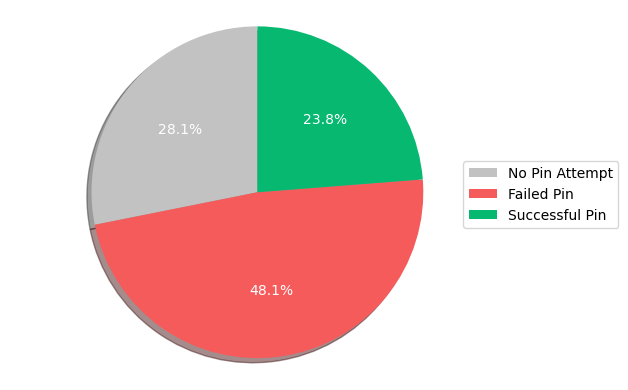

In [480]:
# Plot pie chart for pins
mpl.style.use("default")
labels = "No Pin Attempt", 'Failed Pin', 'Successful Pin'
sizes = [no_pin_attempt_count, failed_pin_count, succ_pin_count]
colors = [grey, "#f55b5b", gk_green]
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    textprops=dict(color="w")
)
ax.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis('equal')
plt.show()

### TODO: How often do users take the Pin approach?

In [167]:
# Get issue IDs that have a successful pin
succ_pin_ids = pin_attempts[pin_attempts['successful_pin'] == True]['issue_id']
issues_with_succ_pin = issues[issues['issue_id'].isin(succ_pin_ids)]

# Get comments and events for issues with successful pin.
issue_ids_with_succ_pin = issues_with_succ_pin['issue_id']
comments_for_issues_with_successful_pin = comments[comments['comment_issue_id'].isin(issue_ids_with_succ_pin)]
events_for_issues_with_successful_pin = events[events['event_issue_id'].isin(issue_ids_with_succ_pin)]

# It doesn't look like there is any indication on the issue report that the user took the bots 
# advice and pinned the dependency using the bots link.
# See issue_id=614163469 comment_id=625987320
user_comments_for_issues_with_successful_pin = \
    comments_for_issues_with_successful_pin[comments_for_issues_with_successful_pin['comment_user_type'] == 'User']
user_comments_for_issues_with_successful_pin.head(20)
get_comments_for_issue(614163469)

,comment_issue_url,comment_issue_id,comment_id,comment_url,comment_created_at,comment_updated_at,comment_body,comment_author_association,comment_user_id,comment_user_login,comment_user_type
1957,https://api.github.com/repos/adobe/aio-lib-console/issues/2,614163469,625343504,https://api.github.com/repos/adobe/aio-lib-console/issues/comments/625343504,2020-05-07T15:59:26Z,2020-05-07T15:59:26Z,After pinning to **3.10.1** your tests are passing again. [Downgrade this dependency 📌](https://github.com/adobe/aio-lib-console/compare/master...adobe:greenkeeper%2Fswagger-client-pin-3.10.1).,CONTRIBUTOR,23040076,greenkeeper[bot],Bot
1958,https://api.github.com/repos/adobe/aio-lib-console/issues/2,614163469,625987320,https://api.github.com/repos/adobe/aio-lib-console/issues/comments/625987320,2020-05-08T19:46:55Z,2020-05-08T19:46:55Z,pinned,MEMBER,36107,shazron,User


In [179]:

succ_pin_issues_commit_events = \
    events_for_issues_with_successful_pin[pd.notna(events_for_issues_with_successful_pin.event_commit_id)]
commit_shas = succ_pin_issues_commit_events['event_commit_id']
commit_shas
# commits[commits['commit_sha'].isin(commit_shas)]
succ_pin_commits = commits[commits['commit_sha'].isin(commit_shas)]
succ_pin_commits.head(-10)

,commit_event_url,commit_event_id,commit_message,commit_git_committer_email,commit_git_committer_name,commit_git_author_email,commit_git_author_name,commit_github_committer_login,commit_github_committer_id,commit_github_committer_type,...,commit_sha,commit_num_parents,commit_num_comments,commit_file_name,commit_file_additions,commit_file_deletions,commit_file_changes,commit_file_sha,commit_file_status,commit_issue_id
4,https://api.github.com/repos/jubianchi/semver-check/issues/events/3605497508,3605497508,"chore: Update deps\n\nCloses #66, #67, #70, #72, #74, #76",contact@jubianchi.fr,jubianchi,contact@jubianchi.fr,jubianchi,jubianchi,327237.0,User,...,88e6ff1cf2f578b2fcf052f221fc17765215f12f,1,0,package.json,7,7,14,006c878112d5c9b16ad609f6b21124f3c1f4bcd3,modified,614969004.0
5,https://api.github.com/repos/jubianchi/semver-check/issues/events/3605497508,3605497508,"chore: Update deps\n\nCloses #66, #67, #70, #72, #74, #76",contact@jubianchi.fr,jubianchi,contact@jubianchi.fr,jubianchi,jubianchi,327237.0,User,...,88e6ff1cf2f578b2fcf052f221fc17765215f12f,1,0,src/components/Constraint.spec.js,1,4,5,1653439b73f4e08820a9baababba3cfe3fb186ac,modified,614969004.0
6,https://api.github.com/repos/jubianchi/semver-check/issues/events/3605497508,3605497508,"chore: Update deps\n\nCloses #66, #67, #70, #72, #74, #76",contact@jubianchi.fr,jubianchi,contact@jubianchi.fr,jubianchi,jubianchi,327237.0,User,...,88e6ff1cf2f578b2fcf052f221fc17765215f12f,1,0,src/components/ExplainConstraint.js,4,3,7,685e8d7e7f2f4a2dd2f6b665cdb9a768bfc27fb4,modified,614969004.0
7,https://api.github.com/repos/jubianchi/semver-check/issues/events/3605497508,3605497508,"chore: Update deps\n\nCloses #66, #67, #70, #72, #74, #76",contact@jubianchi.fr,jubianchi,contact@jubianchi.fr,jubianchi,jubianchi,327237.0,User,...,88e6ff1cf2f578b2fcf052f221fc17765215f12f,1,0,src/components/Router.js,4,4,8,ce0aaa7876e4521096ab085f5793beb518c65e89,modified,614969004.0
8,https://api.github.com/repos/jubianchi/semver-check/issues/events/3605497508,3605497508,"chore: Update deps\n\nCloses #66, #67, #70, #72, #74, #76",contact@jubianchi.fr,jubianchi,contact@jubianchi.fr,jubianchi,jubianchi,327237.0,User,...,88e6ff1cf2f578b2fcf052f221fc17765215f12f,1,0,src/components/Version.spec.js,1,4,5,ff288d8096a4d98e202208e8e715a4e89ebdf67f,modified,614969004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,https://api.github.com/repos/ember-cli/ember-ajax/issues/events/878031443,878031443,Upgrade `ember-cli-htmlbars`\n\nCloses #205,alex@lafroscia.com,Alex LaFroscia,alex@lafroscia.com,Alex LaFroscia,alexlafroscia,1645881.0,User,...,7a471034b9695e0203fc348007df175870033f97,1,0,yarn.lock,33,37,70,7f8396eb569e16ea8328a9f381da191c36422aa1,modified,192362546.0
17595,https://api.github.com/repos/INTECH-RGB/homie-dashboard/issues/events/873424462,873424462,:bug: Fix bad CSS prepros name - fix #16,nivramdu94@gmail.com,Marvin Roger,nivramdu94@gmail.com,Marvin Roger,marvinroger,990773.0,User,...,2c0a390cef40550d4e92d7383416bdbc206a6b32,1,0,app/components/App.vue,6,6,12,0d0c6c850d4977a410e5f0439adb19df570a4c98,modified,191788866.0
17596,https://api.github.com/repos/INTECH-RGB/homie-dashboard/issues/events/873424462,873424462,:bug: Fix bad CSS prepros name - fix #16,nivramdu94@gmail.com,Marvin Roger,nivramdu94@gmail.com,Marvin Roger,marvinroger,990773.0,User,...,2c0a390cef40550d4e92d7383416bdbc206a6b32,1,0,app/components/standalones/Authentication.vue,3,4,7,3de7cf1a0d62c15b75b9cc6eaad3a43a7caf80a2,modified,191788866.0
17597,https://api.github.com/repos/INTECH-RGB/homie-dashboard/issues/events/873424462,873424462,:bug: Fix bad CSS prepros name - fix #16,nivramdu94@gmail.com,Marvin Roger,nivramdu94@gmail.com,Marvin Roger,marvinroger,990773.0,User,...,2c0a390cef40550d4e92d7383416bdbc206a6b32,1,0,yarn.lock,110,115,225,9de7f7c82f3aa0d737d653c0eb5459398be3da39,modified,191788866.0


In [180]:
# events[events['event_issue_id'] == 614163469]
# succ_pin_commits[succ_pin_commits[''] == 614163469]

get_issue(191372846.0)['issue_url']
# events_for_issues_with_successful_pin

122797    https://api.github.com/repos/JsCommunity/human-format/issues/14
Name: issue_url, dtype: object

In [81]:
events[events['event_issue_id'] == 3513599523]


,event_issue_url,event_issue_id,event_id,event_url,event_created_at,event_description,event_actor_id,event_actor_login,event_commit_id,event_commit_url,event_label


In [92]:
# events[(events['event_description'] != 'labeled') & (events['event_description'] != 'closed') & (events['event_description'] != 'reopened')]
events[events['event_description'] == 'referenced'].head()

,event_issue_url,event_issue_id,event_id,event_url,event_created_at,event_description,event_actor_id,event_actor_login,event_commit_id,event_commit_url,event_label
32,https://api.github.com/repos/raymond-lam/writable-stream-and-promise/issues/15,628092079,3513599523,https://api.github.com/repos/raymond-lam/writable-stream-and-promise/issues/events/3513599523,2020-07-05T19:33:20Z,referenced,13293035.0,raymond-lam,953cf69ef9a3a5f6908b05c2594d4b96e881e913,https://api.github.com/repos/raymond-lam/writable-stream-and-promise/commits/953cf69ef9a3a5f6908b05c2594d4b96e881e913,NaN
34,https://api.github.com/repos/raymond-lam/writable-stream-and-promise/issues/15,628092079,3513601137,https://api.github.com/repos/raymond-lam/writable-stream-and-promise/issues/events/3513601137,2020-07-05T19:35:29Z,referenced,13293035.0,raymond-lam,d2c406785c3f4daa423502a62835254f24059741,https://api.github.com/repos/raymond-lam/writable-stream-and-promise/commits/d2c406785c3f4daa423502a62835254f24059741,NaN
669,https://api.github.com/repos/sharvit/generator-node-mdl/issues/93,622407198,3635527854,https://api.github.com/repos/sharvit/generator-node-mdl/issues/events/3635527854,2020-08-08T09:55:50Z,referenced,1262502.0,sharvit,cb2a509a8e3c17f81a058bb36dc5ff15d00a7888,https://api.github.com/repos/sharvit/generator-node-mdl/commits/cb2a509a8e3c17f81a058bb36dc5ff15d00a7888,NaN
2009,https://api.github.com/repos/jubianchi/semver-check/issues/76,614969004,3605497508,https://api.github.com/repos/jubianchi/semver-check/issues/events/3605497508,2020-07-30T19:41:55Z,referenced,327237.0,jubianchi,88e6ff1cf2f578b2fcf052f221fc17765215f12f,https://api.github.com/repos/jubianchi/semver-check/commits/88e6ff1cf2f578b2fcf052f221fc17765215f12f,NaN
2011,https://api.github.com/repos/jubianchi/semver-check/issues/76,614969004,3605516452,https://api.github.com/repos/jubianchi/semver-check/issues/events/3605516452,2020-07-30T19:47:08Z,referenced,327237.0,jubianchi,f19a165d1ab02d8cad202b1782415b4adf29f948,https://api.github.com/repos/jubianchi/semver-check/commits/f19a165d1ab02d8cad202b1782415b4adf29f948,NaN


### How long until the first user interaction?

In [18]:
user_comments = comments[comments['comment_user_type'] == 'User']
issues_with_user_comments = issues[issues['issue_id'].isin(user_comments['comment_issue_id'])]

How long until first user response?

In [19]:
issues_with_user_comments[['issue_url', "issue_id"]].head(10)

,issue_url,issue_id
21,https://api.github.com/repos/cssinjs/caniuse-support/issues/71,629741164
26,https://api.github.com/repos/cssinjs/caniuse-support/issues/70,628799957
34,https://api.github.com/repos/cerner/carbon-graphs/issues/223,628100727
42,https://api.github.com/repos/atlassian/stricter/issues/121,628604170
44,https://api.github.com/repos/cerner/carbon-graphs/issues/226,628657186
72,https://api.github.com/repos/cssinjs/css-vendor/issues/209,627843386
106,https://api.github.com/repos/cerner/carbon-graphs/issues/221,627134159
194,https://api.github.com/repos/Mermade/oas-kit/issues/231,625292166
213,https://api.github.com/repos/cerner/carbon-graphs/issues/218,625315492
240,https://api.github.com/repos/johnpapa/vscode-peacock/issues/396,625109277


In [20]:
issue_id = 629741164

events[events['event_issue_id'] == issue_id]


,event_issue_url,event_issue_id,event_id,event_url,event_created_at,event_description,event_actor_id,event_actor_login,event_commit_id,event_commit_url,event_label
25,https://api.github.com/repos/cssinjs/caniuse-support/issues/71,629741164,3400682154,https://api.github.com/repos/cssinjs/caniuse-support/issues/events/3400682154,2020-06-03T06:53:03Z,labeled,23040076.0,greenkeeper[bot],NaN,NaN,greenkeeper
26,https://api.github.com/repos/cssinjs/caniuse-support/issues/71,629741164,3604755981,https://api.github.com/repos/cssinjs/caniuse-support/issues/events/3604755981,2020-07-30T16:33:52Z,closed,1459899.0,AleshaOleg,NaN,NaN,NaN


In [21]:
get_comments_for_issue(issue_id)

,comment_issue_url,comment_issue_id,comment_id,comment_url,comment_created_at,comment_updated_at,comment_body,comment_author_association,comment_user_id,comment_user_login,comment_user_type
19,https://api.github.com/repos/cssinjs/caniuse-support/issues/71,629741164,637996706,https://api.github.com/repos/cssinjs/caniuse-support/issues/comments/637996706,2020-06-03T06:54:19Z,2020-06-03T06:54:19Z,After pinning to **1.3.0** your tests are still failing. The reported issue _might_ not affect your project. These imprecisions are caused by inconsistent test results.,CONTRIBUTOR,23040076,greenkeeper[bot],Bot
20,https://api.github.com/repos/cssinjs/caniuse-support/issues/71,629741164,638021467,https://api.github.com/repos/cssinjs/caniuse-support/issues/comments/638021467,2020-06-03T07:42:43Z,2020-06-03T07:42:43Z,"- The `devDependency` [merge2](https://github.com/teambition/merge2) was updated from `1.4.0` to `1.4.1`.\n\n\nYour tests are passing again with this update. [Explicitly upgrade to this version 🚀](https://github.com/cssinjs/caniuse-support/compare/master...cssinjs:greenkeeper%2Fmerge2-1.4.1)\n\n\n\n<details>\n<summary>Commits</summary>\n<p>The new version differs by 1 commits.</p>\n<ul>\n<li><a href=""https://urls.greenkeeper.io/teambition/merge2/commit/a7300d42983d668f61d751ad2bfc42c880a29a36""><code>a7300d4</code></a> <code>Fixed: remove error listener on end.</code></li>\n</ul>\n<p>See the <a href=""https://urls.greenkeeper.io/teambition/merge2/compare/5dc3ea60a18feed7fd26f29ec2f06ddb89bf88cd...a7300d42983d668f61d751ad2bfc42c880a29a36"">full diff</a></p>\n</details>",CONTRIBUTOR,23040076,greenkeeper[bot],Bot
21,https://api.github.com/repos/cssinjs/caniuse-support/issues/71,629741164,666510646,https://api.github.com/repos/cssinjs/caniuse-support/issues/comments/666510646,2020-07-30T16:33:52Z,2020-07-30T16:33:52Z,https://github.com/cssinjs/caniuse-support/pull/73,MEMBER,1459899,AleshaOleg,User
